In [7]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt
import upsetplot as usp

In [8]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = ""
config_filename = "config_all_3files.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

#var = "per_user_id"
var = "per_user_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["upset_plot"]["input"][var]
dataset_labels = IO_json["upset_plot"]["dataset_labels"]
output = IO_json["upset_plot"]["output"][var]

cols = []
for ds in dataset_labels:
    cols.append(dataset_labels[ds])
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS-Uploader)']


In [9]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
for i in range(3):
    df[cols[i]] = ~pd.isna(df[f"user_id_{i+1}"])

df = df[cols]


In [10]:

df2 = usp.from_indicators(df)
print(df2)


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
True          False          False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                                                        ... 
False         False          True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
Name: ones, Length: 56962, dtype: float64


created image: /home/reinhold/Daten/OPEN/Duplicate_persons_data_per_user_id_date.png


<Figure size 1080x1080 with 0 Axes>

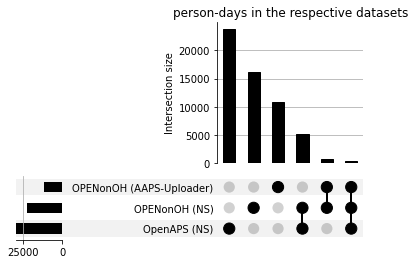

In [11]:
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.figure(figsize=(15,15))
plt.tight_layout()
usp.plot(df2, subset_size='count')
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")



In [12]:
# upset = usp.UpSet(df2, subset_size='count', intersection_plot_elements=3)
# upset.plot()
#upset.add_catplot(value='median_value', kind='strip', color='blue')
#upset.add_catplot(value='AGE', kind='strip', color='black')

# for venn3 diagramm
#df3 = df.groupby([f"cat{i}" for i in range(3)], dropna=False).agg("count")
#print(df3)

#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)